In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.special
sns.set(style="ticks")
import statsmodels.api as sm
import os
import copy

%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Times New Roman'],'size':10})
import yaml

data=yaml.load(open("results.yaml"))
print("Loaded",len(data),"points")


Loaded 24 points


In [2]:
def by_accuracy(nm,title):
  colors={'afm':'r','tb':'b'}
  symbols={'hf':'s','opt':'o','dmc':'^'}
  fig,axes=plt.subplots(3,1,figsize=(8,8),sharex=True,sharey=True)
  axis_labela={'hf':0,'opt':1,'dmc':2}
  for ext in ['hf','opt','dmc']:
    axa=axis_labela[ext]
    for twf in ['afm','tb']:
      x=[]
      e=[]
      err=[]
      twf_save=""
      for entry in data:
        if twf in entry['twf'] and entry['ext']==ext:
          x.append(entry['a'])
          e.append(entry[nm])
          err.append(entry[nm+'_err'])
          twf_save=entry['twf']
      if len(x) > 0:
        axes[axa].errorbar(x,e,err,label=twf_save,
                   marker=symbols[ext],color=colors[twf],
                   markersize=10)
      
  axes[0].set_title(title,fontsize=15)
  for i,nm in zip(range(0,3),["VMC","VMC","DMC"]):
    axes[i].legend(loc='center left', bbox_to_anchor=(1., 0.5),
          fancybox=True, shadow=False, ncol=1,fontsize=10,
          title=nm)


    
def by_twf(nm,title):
  colors={'afm':'r','tb':'b'}
  symbols={'hf':'s','opt':'o','dmc':'^'}
  fig,axes=plt.subplots(2,1,figsize=(8,8),sharex=True,sharey=True)
  axis_labela={'afm':0,'tb':1}
  labels={'hf':'VMC(slater)','opt':'VMC(slater-jastrow)','dmc':'DMC(slater-jastrow)'}
  for ext in ['hf','opt','dmc']:
    for twf in ['afm','tb']:
      axa=axis_labela[twf]
      x=[]
      e=[]
      err=[]
      twf_save=""
      for entry in data:
        if twf in entry['twf'] and entry['ext']==ext:
          x.append(entry['a'])
          e.append(entry[nm])
          err.append(entry[nm+'_err'])
          twf_save=entry['twf']
      if len(x) > 0:
        axes[axa].errorbar(x,e,err,label=labels[ext],
                   marker=symbols[ext],color=colors[twf],
                   markersize=10)
  axes[0].set_title(title,fontsize=15)
  for i,nm in zip(range(0,2),["afm","tb"]):
    axes[i].legend(loc='center left', bbox_to_anchor=(1., 0.5),
          fancybox=True, shadow=False, ncol=1,fontsize=10,
          title=nm)




/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


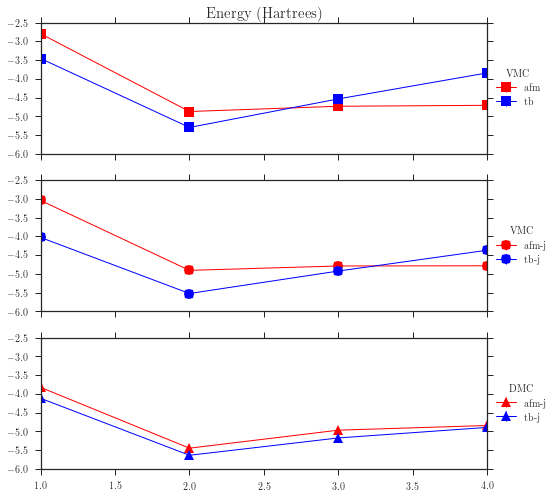

In [3]:
by_accuracy('en',"Energy (Hartrees)")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


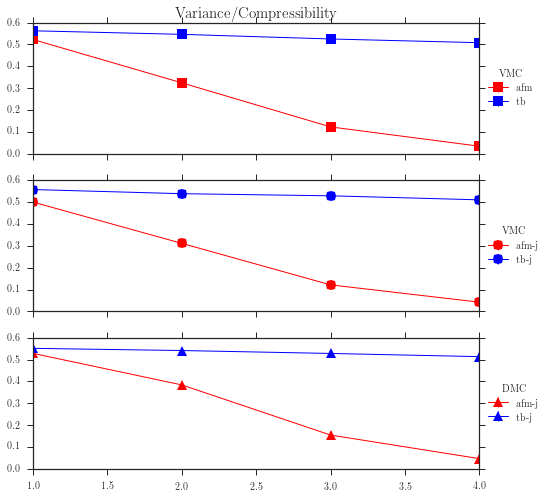

In [4]:
by_accuracy('variance',"Variance/Compressibility")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


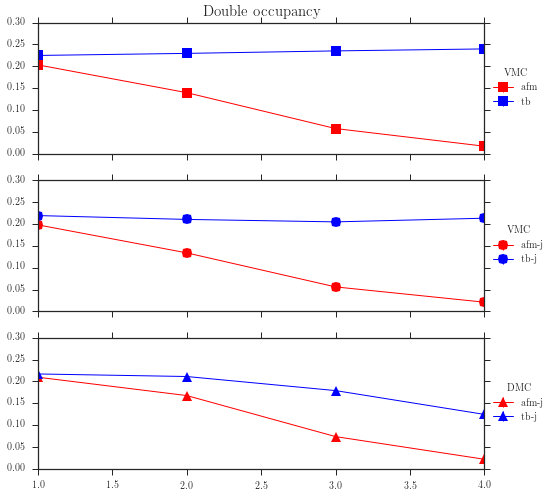

In [5]:
by_accuracy('double_occupancy',"Double occupancy")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


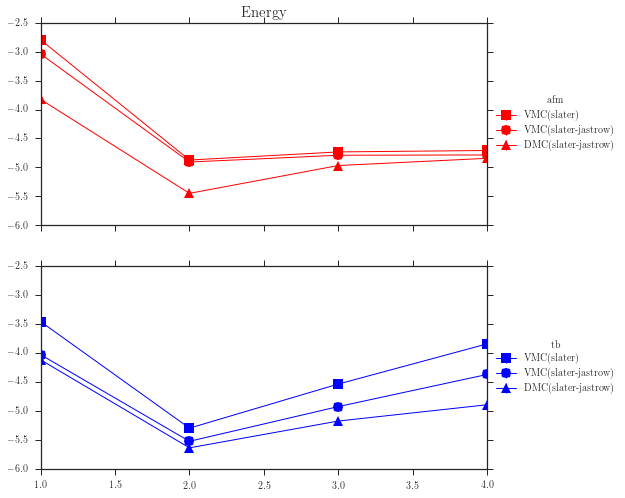

In [6]:
by_twf('en',"Energy")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


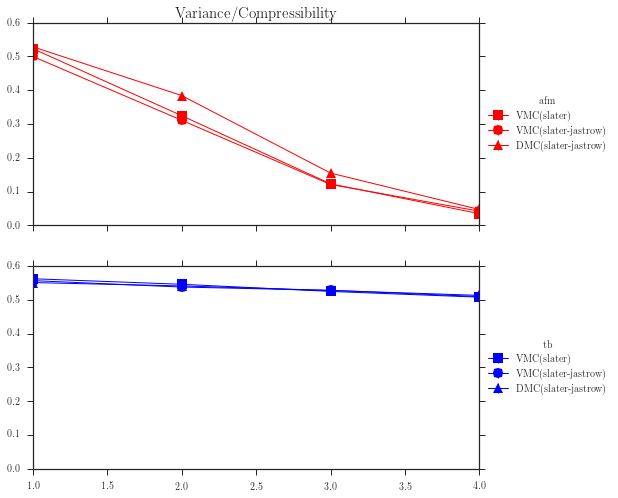

In [7]:
by_twf('variance',"Variance/Compressibility")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


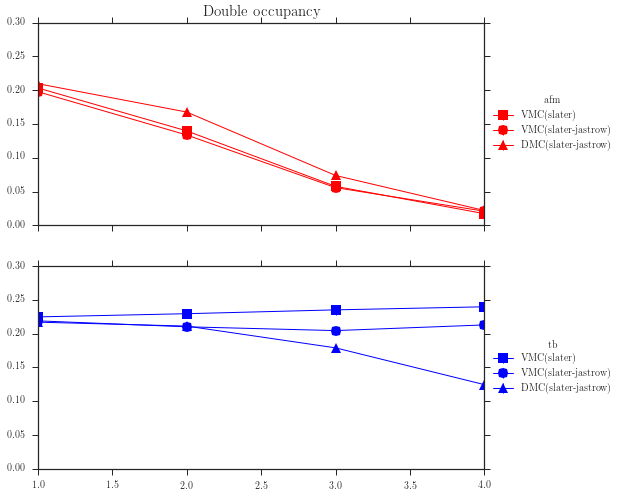

In [8]:
by_twf('double_occupancy',"Double occupancy")